In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("covid_19_indonesia_time_series_all.csv")

In [35]:
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [43]:
# Mengubah kolom 'Date' ke format datetime
data['Date'] = pd.to_datetime(data['Date'])

In [45]:
# Menambahkan kolom Tahun dan Bulan
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [48]:
# Mengelompokkan data berdasarkan Tahun dan Bulan
grouped = data.groupby(['Year', 'Month'])

In [64]:
# Mencari tanggal dengan kasus tertinggi dan terendah untuk setiap tahun-bulan
results = []
for (year, month), group in grouped:
    max_date = group.loc[group['Total Cases'].idxmax()]
    min_date = group.loc[group['Total Cases'].idxmin()]
    results.append({
        'Year': year,
        'Month': month,
        'Max_Date': max_date['Date'],
        'Max_Cases': max_date['Total Cases'],
        'Min_Date': min_date['Date'],
        'Min_Cases': min_date['Total Cases']
    })

In [66]:
# Membuat DataFrame dari hasil
results_df = pd.DataFrame(results)

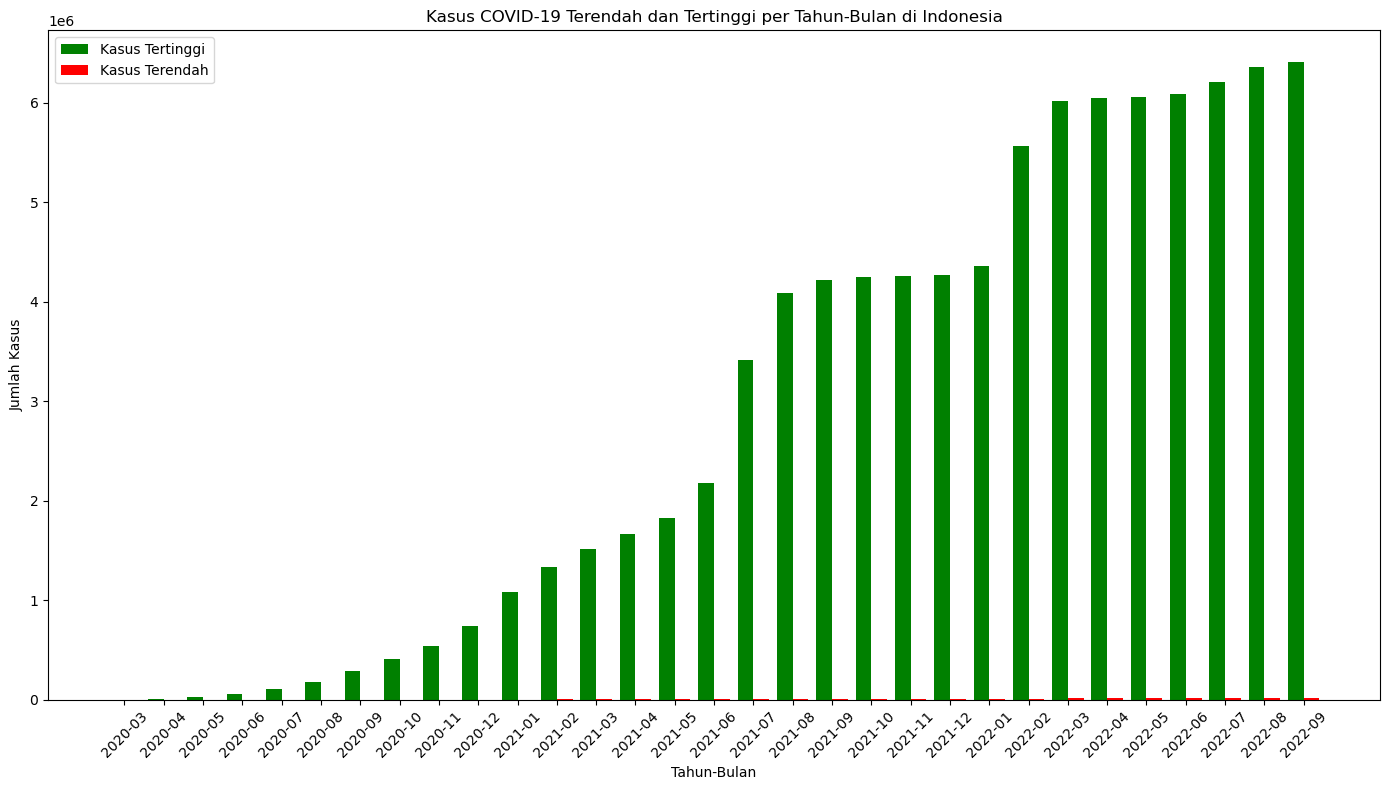

In [74]:
# Diagram Batang: Kasus Tertinggi dan Terendah per Tahun-Bulan
plt.figure(figsize=(14, 8))
x = range(len(results_df))
# Batang untuk Kasus Tertinggi
plt.bar(x, results_df['Max_Cases'], width=0.4, label='Kasus Tertinggi', color='green', align='center')
# Batang untuk Kasus Terendah
plt.bar([p + 0.4 for p in x], results_df['Min_Cases'], width=0.4, label='Kasus Terendah', color='red', align='center')
# Menambahkan label dan judul
plt.title('Kasus COVID-19 Terendah dan Tertinggi per Tahun-Bulan di Indonesia')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah Kasus')
# Mengatur xticks untuk menampilkan Tahun-Bulan
plt.xticks([p + 0.2 for p in x], [f"{row['Year']}-{row['Month']:02d}" for index, row in results_df.iterrows()])
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
# Contoh untuk bulan tertentu
month_data = results_df[results_df['Year'] == 2021][results_df['Month'] == 1]  # Bisa diubah Tahun dan Bulan nya sesuai dengan diagram batang diatas
labels = ['Kasus Tertinggi', 'Kasus Terendah']
sizes = [month_data['Max_Cases'].values[0], month_data['Min_Cases'].values[0]]

C:\Users\Farras\AppData\Local\Temp\ipykernel_14724\2023251155.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  month_data = results_df[results_df['Year'] == 2021][results_df['Month'] == 1]  # Mengambil data untuk Januari 2021


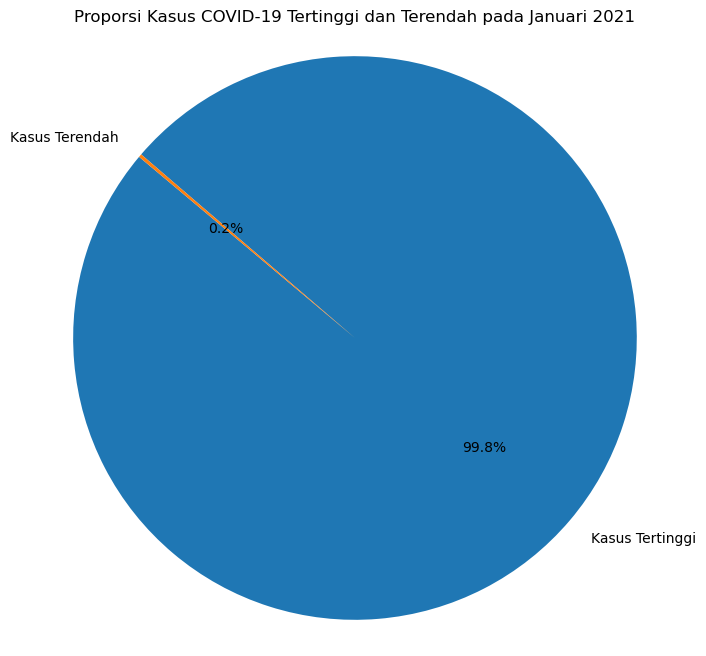

In [78]:
# Diagram Pie
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Kasus COVID-19 Tertinggi dan Terendah pada Januari 2021')
plt.axis('equal')  # jangan diubah ini agar lingkaran terlihat sempurna
plt.show()

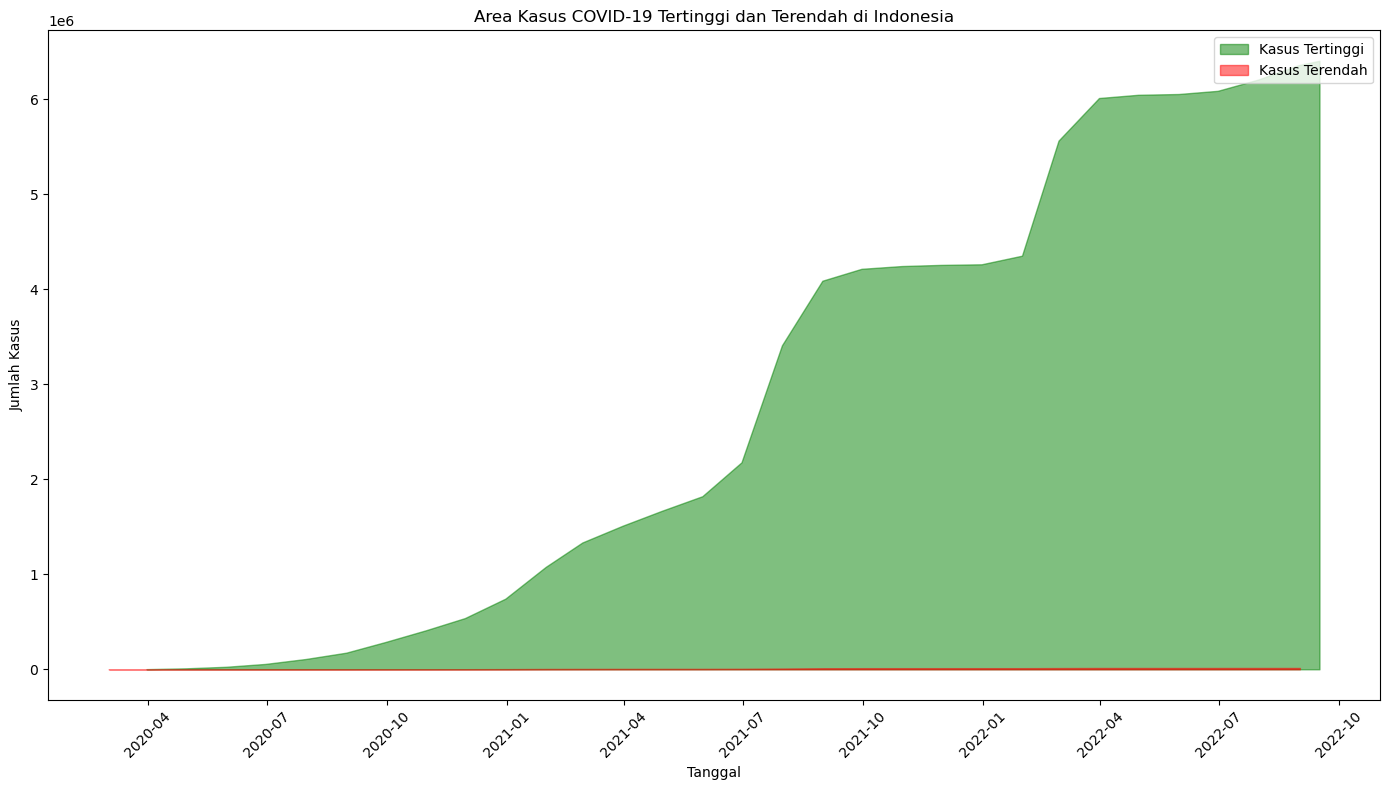

In [91]:
# Diagram Area
plt.figure(figsize=(14, 8))
# Menggambar area untuk Kasus Tertinggi
plt.fill_between(results_df['Max_Date'], results_df['Max_Cases'], color='green', alpha=0.5, label='Kasus Tertinggi')
# Menggambar area untuk Kasus Terendah
plt.fill_between(results_df['Min_Date'], results_df['Min_Cases'], color='red', alpha=0.5, label='Kasus Terendah')
plt.title('Area Kasus COVID-19 Tertinggi dan Terendah di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
# Menghitung jumlah kasus per bulan dan tahun
heatmap_data = results_df.pivot("Year", "Month", "Max_Cases")  # Ganti dengan 'Min_Cases' jika ingin melihat yang terendah

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [ ]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Jumlah Kasus'})
plt.title('Heatmap Kasus COVID-19 Tertinggi per Bulan dan Tahun')
plt.xlabel('Bulan')
plt.ylabel('Tahun')
plt.show()